# Video Game Rank Data EDA

In [1]:
video_game_data = pd.read_csv('./vgsales.csv')

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

In [4]:
video_game_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
video_game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### NnN 값을 가지고 있는 Column 확인

In [9]:
video_game_data.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [10]:
video_game_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### NaN 값을 가지고 있는 Row Drop

In [13]:
video_game_data.dropna(how="any", inplace = True)

In [14]:
video_game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
video_game_data.Year = video_game_data.Year.astype(int)

In [18]:
video_game_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### 총 Publisher 수

In [24]:
len(list(set(video_game_data["Publisher"])))

576

In [57]:
vgd_publisher = list(set(video_game_data["Publisher"]))
df1 = pd.DataFrame()
for publisher in vgd_publisher:
    series = pd.Series({publisher:len(video_game_data[video_game_data["Publisher"]==publisher])})
    df2 = pd.DataFrame(series)
    df1 = pd.DataFrame.append(df1,df2)

df1.tail()

,0
Deep Silver,121
Metro 3D,12
Bomb,1
Prototype,27
Happinet,5


In [58]:
df1 = df1.rename(columns={0: 'num of platforms'})

In [65]:
df1.sort_values(by="num of platforms", ascending=False, inplace=True)
df1.head(10)

,num of platforms
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,917
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,682
Sega,632
Take-Two Interactive,412


#### release 년도 확인

In [25]:
set(video_game_data["Year"])

{1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020}

- release년도가 2020년인 게임의 sales 데이터는 불가능하므로 지워준다. 

In [27]:
video_game_data = video_game_data[video_game_data["Year"] != 2020]

In [29]:
len(video_game_data[video_game_data["Year"] == 2020])

0

#### 각 sale 의 평균값

- North America 의 평균값

In [79]:
na_sales_mean = video_game_data["NA_Sales"].mean()
na_sales_mean

0.26564640883979906

- Europe 의 평균값

In [80]:
eu_sales_mean = video_game_data["EU_Sales"].mean()
eu_sales_mean

0.14774033149174562

- Japan 의 평균값

In [81]:
jp_sales_mean = video_game_data["JP_Sales"].mean()
jp_sales_mean

0.07883793738489277

- 그외의 나라 평균

In [82]:
Other_sales_mean = video_game_data["Other_Sales"].mean()
Other_sales_mean

0.04842786985880199

- 전세게의 평균값

In [85]:
gl_sales_mean = video_game_data["Global_Sales"].mean()
gl_sales_mean

0.5409257213014633

In [88]:
sales_mean_sum = na_sales_mean + eu_sales_mean + jp_sales_mean + Other_sales_mean
sales_mean_sum

0.5406525475752394

In [89]:
gl_sales_mean - sales_mean_sum

0.00027317372622392977

- 근소한 차이를 보이므로 gl_sales_mean값은 다른 sale 값들의 합이라고 할 수 있다.

#### 각 대륙별 TOP 10 sale ranking

- North America TOP 10

In [161]:
ranklimit = 30

In [162]:
na_sales_rangking = video_game_data.sort_values(by="NA_Sales", ascending=False).head(ranklimit)
na_sales_rangking.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


- Europe America TOP 10

In [163]:
eu_sales_rangking = video_game_data.sort_values(by="EU_Sales", ascending=False).head(ranklimit)
eu_sales_rangking.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


- Japan TOP 10

In [164]:
jp_sales_rangking = video_game_data.sort_values(by="JP_Sales", ascending=False).head(ranklimit)
jp_sales_rangking.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


- Other TOP 10

In [165]:
ot_sales_rangking = video_game_data.sort_values(by="Other_Sales", ascending=False).head(ranklimit)
ot_sales_rangking.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


- Global TOP 10

In [166]:
gl_sales_rangking = video_game_data.sort_values(by="Global_Sales", ascending=False).head(ranklimit)
gl_sales_rangking.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### global_sale 과 TOP30 중에서 겹치는 순위의 개수

In [167]:
def simularto(sales_ranking) :
    tmp_list = list(sales_ranking["Rank"])
    for rank in list(gl_sales_rangking["Rank"]) :
        if rank in list(sales_ranking["Rank"]) :
            tmp_list.remove(rank)
    return ranklimit - len(tmp_list)

In [168]:
result = simularto(na_sales_rangking)
result

24

In [169]:
result = simularto(eu_sales_rangking)
result

20

In [170]:
result = simularto(jp_sales_rangking)
result

17

In [171]:
result = simularto(ot_sales_rangking)
result

14

- TOP 30위 까지 비교했을 때는 North America와 Europe이 Global TOP과 가장 흡사하다고 할 수 있다.

In [195]:
video_game_data[video_game_data["Global_Sales"] > video_game_data.loc[4999,"Global_Sales"]]["Global_Sales"].sum() / video_game_data["Global_Sales"].sum() * 100

83.89762224683602

- 랭킹 5000위(약 전체의1/3) 까지의 Global_Sales는 전체의 84% 에 이른다.

#### 상관계수 구하기

In [196]:
video_game_data["Global_Sales"].corr(video_game_data["NA_Sales"])

0.9412700089266657

In [197]:
video_game_data["Global_Sales"].corr(video_game_data["EU_Sales"])

0.9032639266498974

In [198]:
video_game_data["Global_Sales"].corr(video_game_data["JP_Sales"])

0.6127733707533985

In [199]:
video_game_data["Global_Sales"].corr(video_game_data["Other_Sales"])

0.7479635381324652

In [203]:
video_game_data["Global_Sales"].corr(video_game_data["Rank"])

-0.42698308891601783

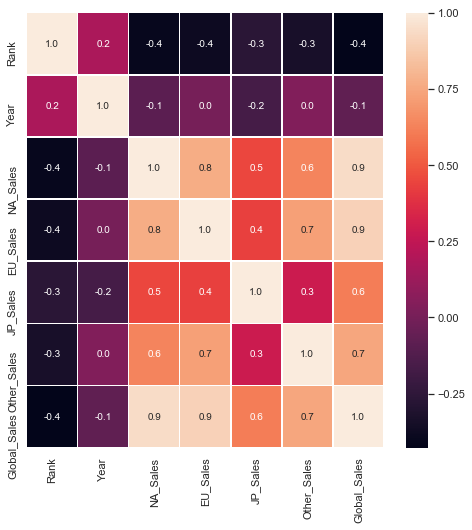

In [206]:
%matplotlib inline
corr = video_game_data.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

#### 각 publisher 와 Rank와의 상관관계

In [216]:
video_game_data[video_game_data["Publisher"] == "Nintendo"]["Global_Sales"].corr(video_game_data[video_game_data["Publisher"] == "Nintendo"]["Rank"])

-0.3657761097021752

In [225]:
vgd_publisher = list(set(video_game_data["Publisher"]))
df_pub_corr = pd.DataFrame()
for publisher in vgd_publisher:
    series = pd.Series({publisher:video_game_data[video_game_data["Publisher"] == publisher]["Global_Sales"].corr(video_game_data[video_game_data["Publisher"] == publisher]["Rank"])})
    df2 = pd.DataFrame(series)
    df_pub_corr = pd.DataFrame.append(df_pub_corr,df2)

df_pub_corr.head()

,0
Nippon Amuse,NaN
Parker Bros.,-0.836616
GSP,-0.876904
Idea Factory International,-0.992446
Blue Byte,-1.000000


#### 년도별 sales 파악

In [231]:
years = list(set(video_game_data["Year"]))
df_year_sales = pd.DataFrame()
for year in years:
    series = pd.Series({year:video_game_data[video_game_data["Year"] == year]["Global_Sales"].sum()})
    df2 = pd.DataFrame(series)
    df_year_sales = pd.DataFrame.append(df_year_sales,df2)

df_year_sales.head()

,0
1980,11.38
1981,35.77
1982,28.86
1983,16.79
1984,50.36


In [232]:
df_year_sales = df_year_sales.rename(columns={0: 'sales of year'})

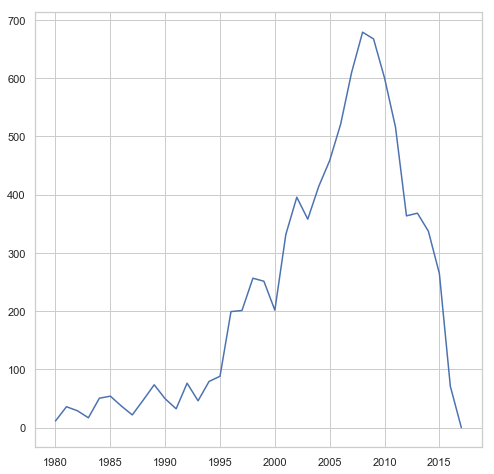

In [237]:
plt.figure(figsize=(8,8))
plt.plot(df_year_sales)